## Bowling in powerplay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from utils import add_overs


In [2]:
df = pickle.load(open('./database/bowling_record.df', 'rb'))
df.head(1)

,bowler,O,M,R,W,0s,1s,2s,3s,4s,...,Team,Against,Win,Tied,Toss,team-total,season,date,match-id,ovs
0,P Kumar,4,0,38,0,14,3,2,0,3,...,Royal Challengers Bangalore,Kolkata Knight Riders,False,False,True,222,2008,2008-04-18,335982,"{1: {'R': 1, 'W': 0}, 3: {'R': 5, 'W': 0}, 5: ..."


In [3]:
def bowling_breakup():
    
    
    def read_pp_overs(ovs_list):
        
        #for (ov_i, ov_j) in [[0,6], [6,15], [15, 20]]
        
        first_six_ov  = len([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>0) and (k<=6)) ] )
        middle_ov     = len([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>6) and (k<=15)) ] )
        last_five_ov  = len([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>15) and (k<=20)) ] )
        
        first_six_run = sum([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>0) and (k<=6)) ] )
        middle_run    = sum([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>6) and (k<=15)) ] )
        last_five_run = sum([ovs[k]['R'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>15) and (k<=20)) ] )
        
        first_six_wkt = sum([ovs[k]['W'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>0) and (k<=6)) ] )
        middle_wkt    = sum([ovs[k]['W'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>6) and (k<=15)) ] )
        last_five_wkt = sum([ovs[k]['W'] for ovs in ovs_list for k in list(ovs.keys()) if ((k>15) and (k<=20)) ] )
        
        return first_six_ov, first_six_run, first_six_wkt, middle_ov, middle_run, middle_wkt, last_five_ov, last_five_run, last_five_wkt

    df = pickle.load(open('./database/bowling_record.df', 'rb'))
    all_players = df['bowler'].unique()
    
    data=[]
    for player in all_players:
        dfp = df[ df['bowler'] == player ]
        first_six_ov, first_six_run, first_six_wkt, middle_ov, middle_run, middle_wkt, last_five_ov, last_five_run, last_five_wkt = read_pp_overs(list(dfp['ovs']))
        data.append([player, first_six_ov, first_six_run, first_six_wkt, middle_ov, middle_run, middle_wkt, last_five_ov, last_five_run, last_five_wkt])
        
    
    dff = pd.DataFrame(data, columns=['bowler', 'first_six_ov', 'first_six_run', 'first_six_wkt',
                                      'middle_ov', 'middle_run', 'middle_wkt',
                                      'last_five_ov', 'last_five_run', 'last_five_wkt'])

    dff['first_six_eco'] = round( dff['first_six_run']/ (dff['first_six_ov']+0.00001 ),  2)
    dff['middle_eco']    = round( dff['middle_run']   / (dff['middle_ov']   +0.00001 ),  2)
    dff['last_five_eco'] = round( dff['last_five_run']/ (dff['last_five_ov']+0.00001 ),  2)
    
    dff['total-ov']  = dff['first_six_ov']  + dff['middle_ov']  + dff['last_five_ov']
    dff['total-run'] = dff['first_six_run'] + dff['middle_run'] + dff['last_five_run']
    dff['total-wkt'] = dff['first_six_wkt'] + dff['middle_wkt'] + dff['last_five_wkt']
    dff['total-eco'] = round( dff['total-run']/(dff['total-ov']+0.00001 ),  2)
    
    return dff

dff = bowling_breakup()
dff.head()

,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
0,P Kumar,262,1756,40,60,465,14,102,1035,36,6.70,7.75,10.15,424,3256,90,7.68
1,Z Khan,217,1455,53,51,418,13,103,923,37,6.71,8.20,8.96,371,2796,103,7.54
2,AA Noffke,1,22,0,1,7,0,2,11,1,22.00,7.00,5.50,4,40,1,10.00
3,JH Kallis,86,632,18,145,1062,23,60,608,24,7.35,7.32,10.13,291,2302,65,7.91
4,SB Joshi,0,0,0,8,69,0,2,13,1,0.00,8.62,6.50,10,82,1,8.20


## Best in different bowling categories

In [4]:
catagories = ['first_six_ov', 'middle_ov', 'last_five_ov', 'first_six_wkt', 'middle_wkt',
              'last_five_wkt', 'total-ov', 'total-wkt', 'first_six_eco', 'middle_eco', 'last_five_eco']

def find_the_best(catagories, ascending=False):
    dff = bowling_breakup()
    dff = dff[dff['total-ov']>=300]
    for cat in catagories:
        if 'eco' in cat:
            ascending=True
        print (cat)
        display ( dff.sort_values(by=[cat], ascending=ascending)[:5] )

find_the_best(catagories)

first_six_ov


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
0,P Kumar,262,1756,40,60,465,14,102,1035,36,6.70,7.75,10.15,424,3256,90,7.68
211,B Kumar,239,1436,48,52,412,9,163,1411,79,6.01,7.92,8.66,454,3259,136,7.18
1,Z Khan,217,1455,53,51,418,13,103,923,37,6.71,8.20,8.96,371,2796,103,7.54
276,Sandeep Sharma,204,1424,53,65,498,18,75,724,38,6.98,7.66,9.65,344,2646,109,7.69
7,I Sharma,203,1446,43,55,478,12,64,686,16,7.12,8.69,10.72,322,2610,71,8.11


middle_ov


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
84,A Mishra,22,162,6,424,2943,116,83,768,38,7.36,6.94,9.25,529,3873,160,7.32
27,PP Chawla,59,440,18,414,3236,101,73,612,37,7.46,7.82,8.38,546,4288,156,7.85
49,Harbhajan Singh,124,883,30,394,2737,94,45,360,26,7.12,6.95,8.00,563,3980,150,7.07
89,RA Jadeja,22,185,6,350,2602,81,85,694,27,8.41,7.43,8.16,457,3481,114,7.62
144,R Ashwin,153,990,42,309,2124,68,78,595,28,6.47,6.87,7.63,540,3709,138,6.87


last_five_ov


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
55,DJ Bravo,36,281,10,221,1676,48,201,1844,95,7.81,7.58,9.17,458,3801,153,8.30
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11
211,B Kumar,239,1436,48,52,412,9,163,1411,79,6.01,7.92,8.66,454,3259,136,7.18
251,JJ Bumrah,110,724,20,91,581,28,149,1293,61,6.58,6.38,8.68,350,2598,109,7.42
231,SP Narine,121,759,24,203,1329,43,142,1070,60,6.27,6.55,7.54,466,3158,127,6.78


first_six_wkt


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
1,Z Khan,217,1455,53,51,418,13,103,923,37,6.71,8.20,8.96,371,2796,103,7.54
276,Sandeep Sharma,204,1424,53,65,498,18,75,724,38,6.98,7.66,9.65,344,2646,109,7.69
211,B Kumar,239,1436,48,52,412,9,163,1411,79,6.01,7.92,8.66,454,3259,136,7.18
162,UT Yadav,179,1391,45,126,995,25,117,1212,49,7.77,7.90,10.36,422,3598,119,8.53
7,I Sharma,203,1446,43,55,478,12,64,686,16,7.12,8.69,10.72,322,2610,71,8.11


middle_wkt


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
84,A Mishra,22,162,6,424,2943,116,83,768,38,7.36,6.94,9.25,529,3873,160,7.32
27,PP Chawla,59,440,18,414,3236,101,73,612,37,7.46,7.82,8.38,546,4288,156,7.85
49,Harbhajan Singh,124,883,30,394,2737,94,45,360,26,7.12,6.95,8.00,563,3980,150,7.07
268,YS Chahal,58,467,16,250,1812,81,51,475,24,8.05,7.25,9.31,359,2754,121,7.67
89,RA Jadeja,22,185,6,350,2602,81,85,694,27,8.41,7.43,8.16,457,3481,114,7.62


last_five_wkt


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11
55,DJ Bravo,36,281,10,221,1676,48,201,1844,95,7.81,7.58,9.17,458,3801,153,8.30
211,B Kumar,239,1436,48,52,412,9,163,1411,79,6.01,7.92,8.66,454,3259,136,7.18
251,JJ Bumrah,110,724,20,91,581,28,149,1293,61,6.58,6.38,8.68,350,2598,109,7.42
231,SP Narine,121,759,24,203,1329,43,142,1070,60,6.27,6.55,7.54,466,3158,127,6.78


total-ov


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
49,Harbhajan Singh,124,883,30,394,2737,94,45,360,26,7.12,6.95,8.00,563,3980,150,7.07
27,PP Chawla,59,440,18,414,3236,101,73,612,37,7.46,7.82,8.38,546,4288,156,7.85
144,R Ashwin,153,990,42,309,2124,68,78,595,28,6.47,6.87,7.63,540,3709,138,6.87
84,A Mishra,22,162,6,424,2943,116,83,768,38,7.36,6.94,9.25,529,3873,160,7.32
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11


total-wkt


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11
84,A Mishra,22,162,6,424,2943,116,83,768,38,7.36,6.94,9.25,529,3873,160,7.32
27,PP Chawla,59,440,18,414,3236,101,73,612,37,7.46,7.82,8.38,546,4288,156,7.85
55,DJ Bravo,36,281,10,221,1676,48,201,1844,95,7.81,7.58,9.17,458,3801,153,8.30
49,Harbhajan Singh,124,883,30,394,2737,94,45,360,26,7.12,6.95,8.00,563,3980,150,7.07


first_six_eco


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
211,B Kumar,239,1436,48,52,412,9,163,1411,79,6.01,7.92,8.66,454,3259,136,7.18
66,DW Steyn,189,1185,34,68,448,13,107,881,50,6.27,6.59,8.23,364,2514,97,6.91
231,SP Narine,121,759,24,203,1329,43,142,1070,60,6.27,6.55,7.54,466,3158,127,6.78
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11
144,R Ashwin,153,990,42,309,2124,68,78,595,28,6.47,6.87,7.63,540,3709,138,6.87


middle_eco


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
251,JJ Bumrah,110,724,20,91,581,28,149,1293,61,6.58,6.38,8.68,350,2598,109,7.42
231,SP Narine,121,759,24,203,1329,43,142,1070,60,6.27,6.55,7.54,466,3158,127,6.78
66,DW Steyn,189,1185,34,68,448,13,107,881,50,6.27,6.59,8.23,364,2514,97,6.91
144,R Ashwin,153,990,42,309,2124,68,78,595,28,6.47,6.87,7.63,540,3709,138,6.87
42,PP Ojha,40,321,6,229,1587,63,49,449,20,8.02,6.93,9.16,318,2357,89,7.41


last_five_eco


,bowler,first_six_ov,first_six_run,first_six_wkt,middle_ov,middle_run,middle_wkt,last_five_ov,last_five_run,last_five_wkt,first_six_eco,middle_eco,last_five_eco,total-ov,total-run,total-wkt,total-eco
231,SP Narine,121,759,24,203,1329,43,142,1070,60,6.27,6.55,7.54,466,3158,127,6.78
144,R Ashwin,153,990,42,309,2124,68,78,595,28,6.47,6.87,7.63,540,3709,138,6.87
103,SL Malinga,185,1182,37,100,740,25,193,1476,108,6.39,7.40,7.65,478,3398,170,7.11
49,Harbhajan Singh,124,883,30,394,2737,94,45,360,26,7.12,6.95,8.00,563,3980,150,7.07
89,RA Jadeja,22,185,6,350,2602,81,85,694,27,8.41,7.43,8.16,457,3481,114,7.62


## Pie Chart for the top players' wickets

[Here is a nice help for pie chart.](https://stackoverflow.com/questions/43683513/how-can-i-improve-the-rotation-of-fraction-labels-in-a-pyplot-pie-chart)

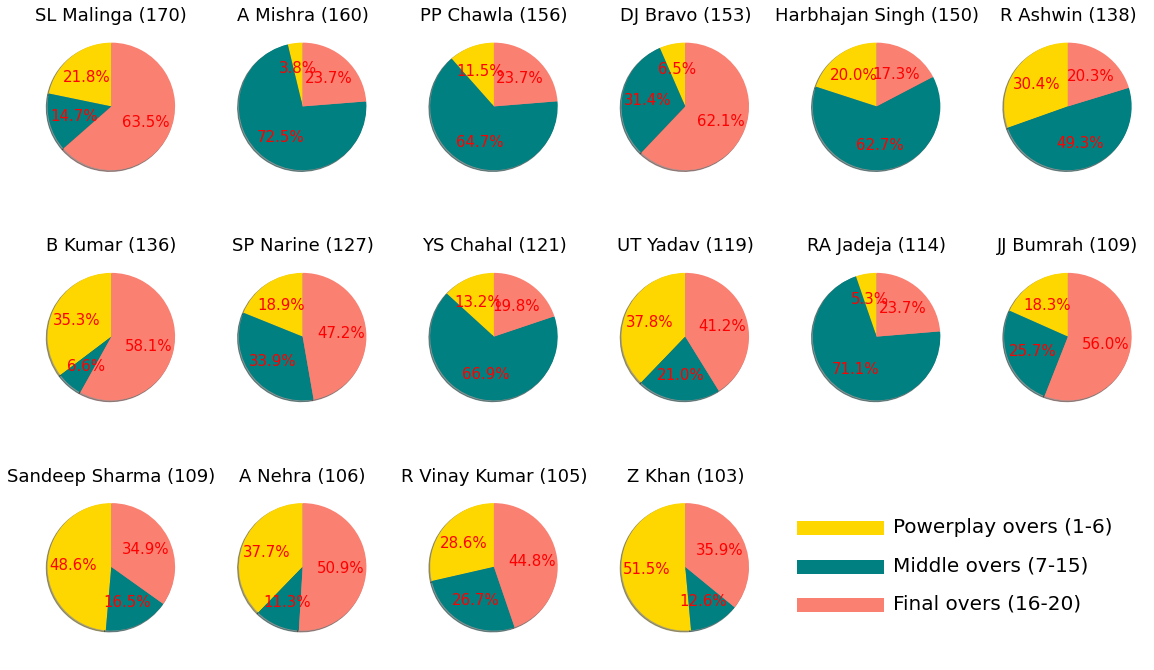

In [9]:
def Plot_Pie():
    dff = bowling_breakup()
    dff = dff[dff['total-wkt']>=100]
    dff = dff.sort_values(by=['total-wkt'], ascending=False)
    
    f1 = ( dff['first_six_wkt'] / dff['total-wkt'] ).values
    f2 = ( dff['middle_wkt']    / dff['total-wkt'] ).values
    f3 = ( dff['last_five_wkt'] / dff['total-wkt'] ).values
    players = dff['bowler']
    
    colors= ['gold', 'teal', 'salmon','hotpink', 'gray', 'blue', 'red',]
    plt.figure(figsize=(20,12))
    for i, player in enumerate(players):
        plt.subplot(3,6,i+1)
        plt.title(player+' ('+str(dff['total-wkt'].values[i])+')', fontsize=18)
        _, _, autotexts= plt.pie([f1[i], f2[i], f3[i]], colors=colors, normalize=False, startangle=90, autopct='%1.1f%%',shadow=True)
        for autotext in autotexts:
            autotext.set_color('red')
            autotext.set_size('15')
    plt.subplot(3, 6, 17)
    plt.axhline(y=2, xmin=0, xmax=0.5, lw=14, color=colors[0])
    plt.axhline(y=1, xmin=0, xmax=0.5, lw=14, color=colors[1])
    plt.axhline(y=0, xmin=0, xmax=0.5, lw=14, color=colors[2])
    plt.text(0.6, 1.9, 'Powerplay overs (1-6)', fontsize=20)
    plt.text(0.6, .9, 'Middle overs (7-15)', fontsize=20)
    plt.text(0.6, -.1, 'Final overs (16-20)', fontsize=20)
    plt.axis('off')
    plt.ylim([-1.5,3.5])
    
Plot_Pie()

## Key Observations


### The powerplay phase (PP) (1-6 overs)
* Most overs : P Kumar (262 ov)
* Most wickets : Z Khan (53 wkt)


### The middle overs (MP) (7-15 overs)
* Most overs : A Mishra (424 ov) 
* Most wickets : A Mishra (116 wkt)


### The Final overs (FP) (16-20 overs)
* Most overs : DJ Bravo (202 ov) 
* Most wickets : SL Malinga (108 wkt)

